## Problem Statement: 
#### Churn prediction is identifying customers that are most likely to live a service. This is important for most companies as acquiring new customers is more costlier than retaining old ones, So the results of Churn prediction help companies focus on customers that are likely to churn and develop strategies for retaining those customers.

#### We have the data given of customers including features like Tenure, City Tier, Gender etc. And a target variable that is Churn(Yes/No). Find out the possible customers who will leave the company, so that e-commerce company can rtake neccesary steps to retain that customer.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_excel("E Commerce Dataset.xlsx",sheet_name='E Comm')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [4]:
df.shape

(5630, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [6]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [7]:
df.Churn.value_counts()

0    4682
1     948
Name: Churn, dtype: int64

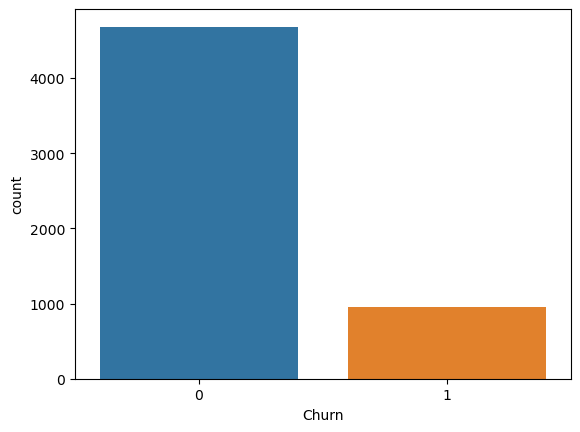

In [8]:
sns.countplot(df['Churn'])
plt.show()

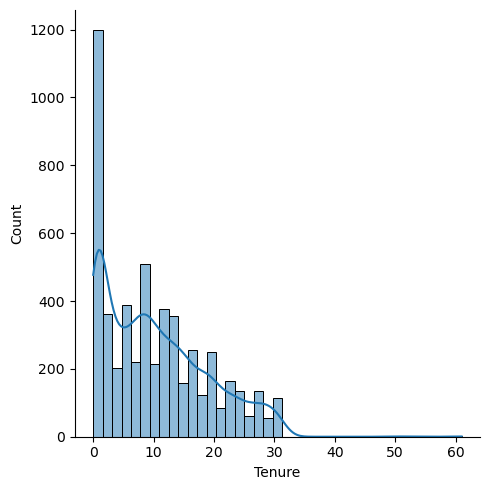

In [9]:
#Distribution of the Tenure of the customers on the platform
sns.displot(df['Tenure'],kde=True)
plt.show()

In [10]:
df.PreferredLoginDevice.value_counts()

Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64

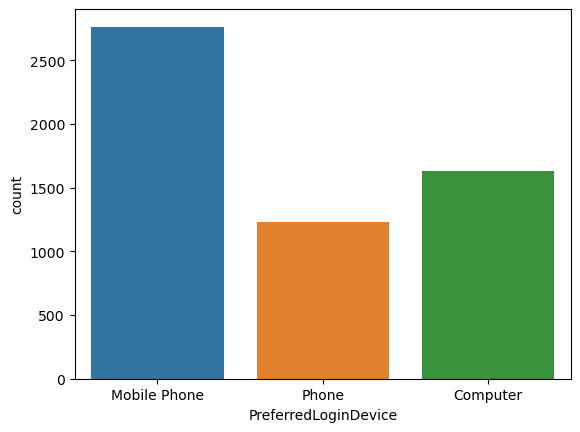

In [11]:
sns.countplot(df.PreferredLoginDevice)
plt.show()

In [12]:
df.CityTier.value_counts()

1    3666
3    1722
2     242
Name: CityTier, dtype: int64

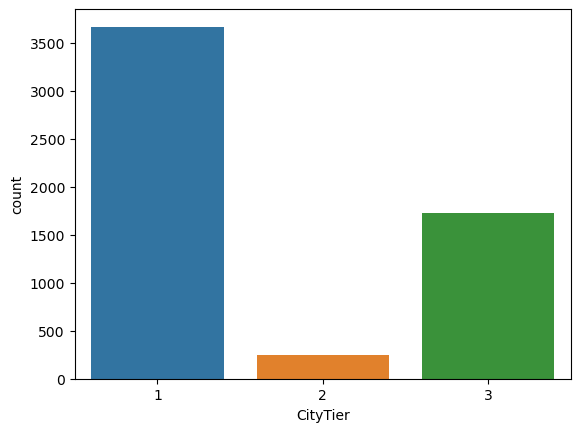

In [13]:
sns.countplot(df.CityTier)
plt.show()

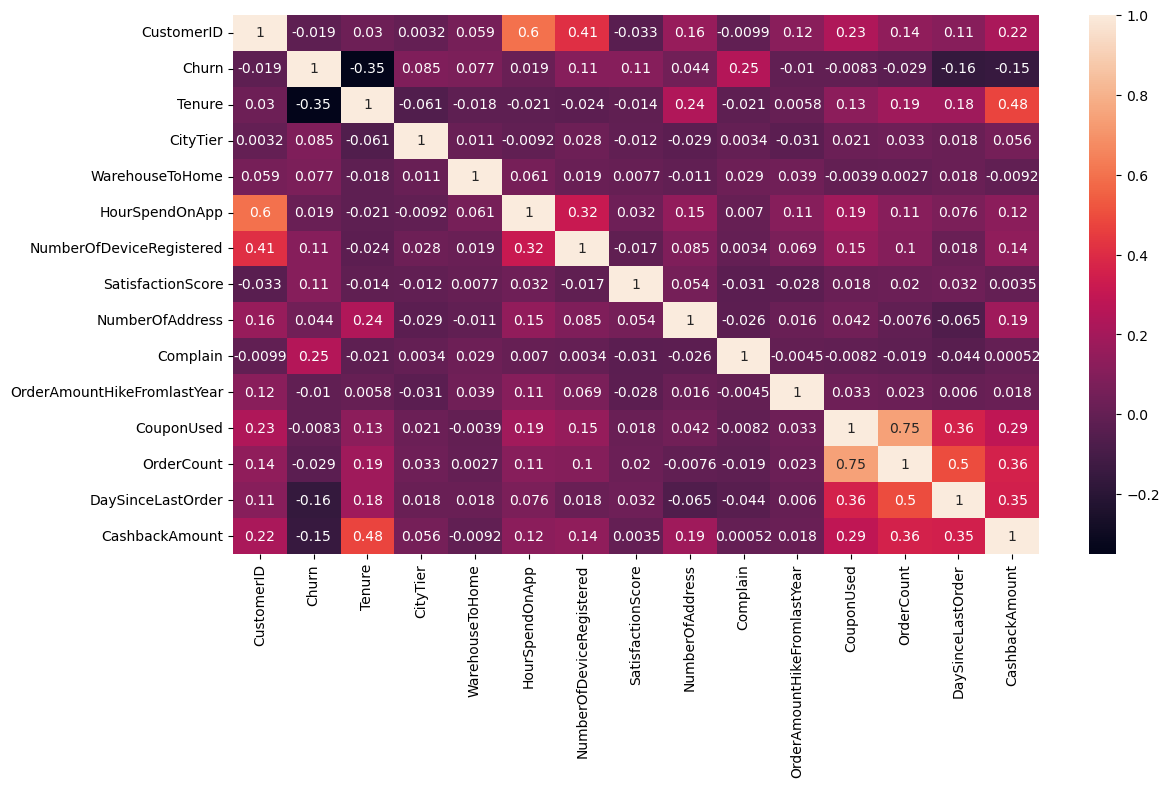

In [14]:
cr=df.corr()
plt.figure(figsize=(13,7))
sns.heatmap(cr,annot=True)
plt.show()

#### Drop the Customer ID and separate X and y variable

In [15]:
df.drop(['CustomerID'],axis=1,inplace=True)

In [16]:
y=df['Churn']
X=df.drop(['Churn'],axis=1)

In [17]:
X.head()

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [18]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Churn, dtype: int64

In [19]:
X.isna().sum()

Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

### Test Train Split

In [20]:
# Train, CV, test split
from sklearn.model_selection import train_test_split
#0.6, 0.2, 0.2 split

X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

In [21]:
X_train.shape,X_val.shape,X_test.shape

((3378, 18), (1126, 18), (1126, 18))

### Use Transformers to Impute and Encode the data

In [22]:
# from sklearn.compose import ColumnTransformer
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# # Select the numerical and categorical columns
# numerical_cols = ['Tenure','CityTier', 'WarehouseToHome', 'HourSpendOnApp','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress', 'Complain','OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder','CashbackAmount']
# categorical_cols = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender','PreferedOrderCat', 'MaritalStatus',]

# transformer = ColumnTransformer(transformers=[
#     ('tnf0', SimpleImputer(strategy='mean'), numerical_cols),
#     ('tnf1', SimpleImputer(strategy='most_frequent'), categorical_cols),
#     ('tnf2', OneHotEncoder(sparse=False, drop='first'), categorical_cols),
#     ('tnf3', MinMaxScaler(feature_range=(0, 1)), numerical_cols)  # Only scale the numerical columns
# ], remainder='passthrough')

# X_train_transformed = transformer.fit_transform(X_train)


In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import pandas as pd

# Select the numerical and categorical columns
numerical_cols = ['Tenure','CityTier', 'WarehouseToHome', 'HourSpendOnApp','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress', 'Complain','OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder','CashbackAmount']
categorical_cols = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender','PreferedOrderCat', 'MaritalStatus',]

# Step 1: Impute missing values in numerical columns
imputer_num = SimpleImputer(strategy='mean')
X_train[numerical_cols] = imputer_num.fit_transform(X_train[numerical_cols])
X_val[numerical_cols] = imputer_num.transform(X_val[numerical_cols])
X_test[numerical_cols] = imputer_num.transform(X_test[numerical_cols])

# Step 2: Impute missing values in categorical columns
imputer_cat = SimpleImputer(strategy='most_frequent')
X_train[categorical_cols] = imputer_cat.fit_transform(X_train[categorical_cols])
X_val[categorical_cols] = imputer_cat.transform(X_val[categorical_cols])
X_test[categorical_cols] = imputer_cat.transform(X_test[categorical_cols])

# Step 3: One-hot encode categorical columns
encoder = OneHotEncoder(sparse=False, drop='first')
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_val_encoded = encoder.transform(X_val[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

# Step 4: Scale numerical columns using Min-Max scaling
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train[numerical_cols])
X_val_scaled = scaler.transform(X_val[numerical_cols])
X_test_scaled = scaler.transform(X_test[numerical_cols])

# Combine encoded categorical columns and scaled numerical columns
X_train_transformed = pd.concat([pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names(categorical_cols)), pd.DataFrame(X_train_scaled, columns=numerical_cols)], axis=1)
X_cv_transformed = pd.concat([pd.DataFrame(X_val_encoded, columns=encoder.get_feature_names(categorical_cols)), pd.DataFrame(X_val_scaled, columns=numerical_cols)], axis=1)
X_test_transformed = pd.concat([pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names(categorical_cols)), pd.DataFrame(X_test_scaled, columns=numerical_cols)], axis=1)

# Print the first few rows of the transformed data
print(X_train_transformed.head())


   PreferredLoginDevice_Mobile Phone  PreferredLoginDevice_Phone  \
0                                1.0                         0.0   
1                                1.0                         0.0   
2                                1.0                         0.0   
3                                1.0                         0.0   
4                                1.0                         0.0   

   PreferredPaymentMode_COD  PreferredPaymentMode_Cash on Delivery  \
0                       0.0                                    0.0   
1                       0.0                                    0.0   
2                       0.0                                    0.0   
3                       0.0                                    0.0   
4                       0.0                                    0.0   

   PreferredPaymentMode_Credit Card  PreferredPaymentMode_Debit Card  \
0                               0.0                              0.0   
1                         

In [24]:
X_train_transformed.shape,X_cv_transformed.shape,X_test_transformed.shape

((3378, 29), (1126, 29), (1126, 29))

# Modeling

## Descision Tree

In [25]:
# Hyper-pram tuning + DT model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

train_scores = []
val_scores = []

l=1
u=20
d=1
w=1.0

for depth in np.arange(l,u,d):
  clf = DecisionTreeClassifier(random_state=0, max_depth=depth, class_weight={ 0:0.1, 1:w } )
  clf.fit(X_train_transformed, y_train)
  train_y_pred = clf.predict(X_train_transformed)
  val_y_pred = clf.predict(X_cv_transformed)
  train_score = f1_score(y_train, train_y_pred)
  val_score = f1_score(y_val, val_y_pred)
  train_scores.append(train_score)
  val_scores.append(val_score)

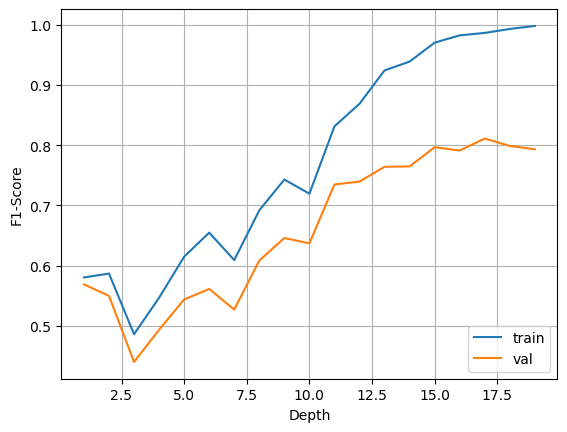

In [26]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(list(np.arange(l,u,d)), train_scores, label="train")
plt.plot(list(np.arange(l,u,d)), val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("Depth")
plt.ylabel("F1-Score")
plt.grid()
plt.show()

In [27]:
# Model with depth_best
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve

best_idx = np.argmax(val_scores)
l_best = 11#l+d*best_idx
print(l_best)
clf = DecisionTreeClassifier(random_state=0, max_depth=l_best, class_weight={ 0:0.1, 1:w } )
clf.fit(X_train_transformed, y_train)

y_pred_val = clf.predict(X_cv_transformed)
val_score = f1_score(y_val, y_pred_val)

print(val_score)

confusion_matrix(y_val, y_pred_val)

11
0.7347931873479318


array([[866,  90],
       [ 19, 151]])

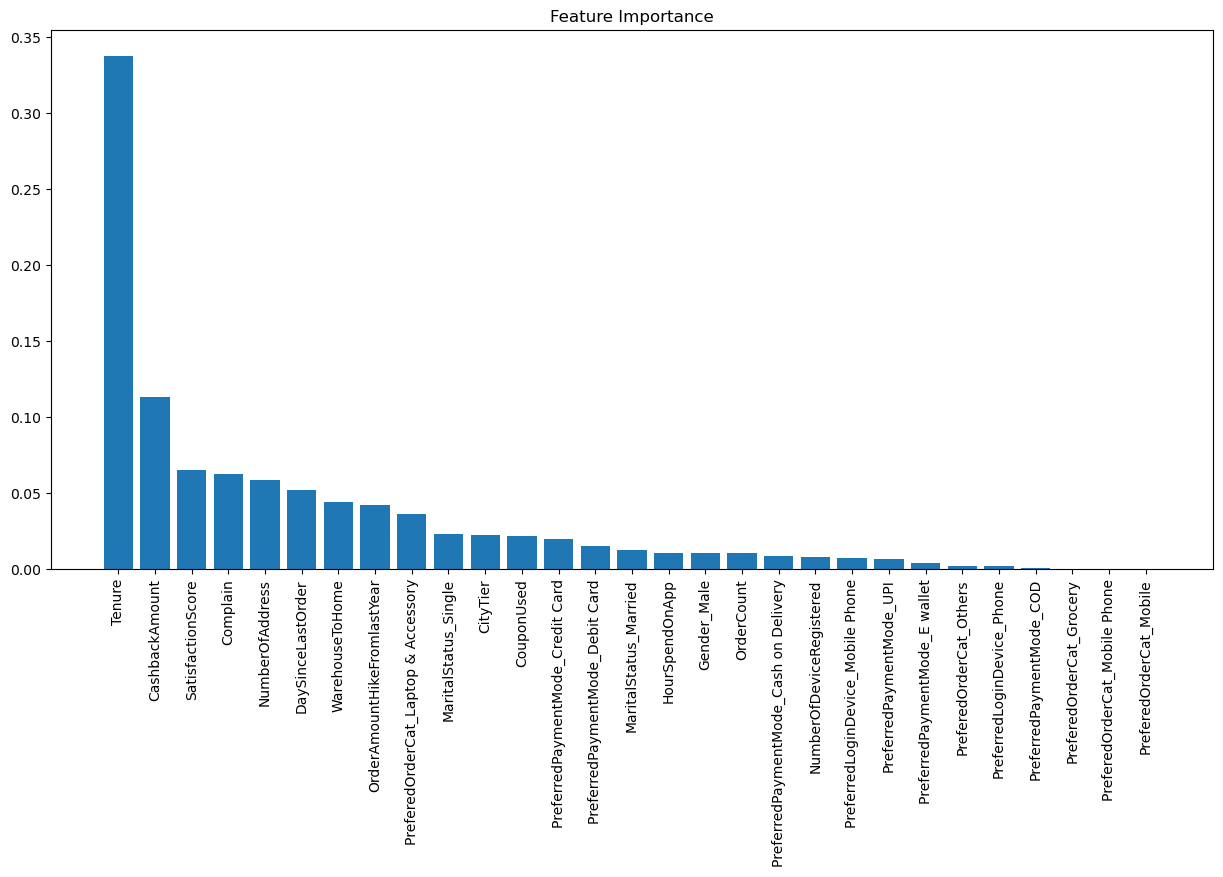

In [28]:
# Feature importance
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train_transformed.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train_transformed.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train_transformed.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

## Random Forest

In [29]:
# Hyper-pram tuning + DT model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

train_scores = []
val_scores = []

l=1
u=20
d=1
w=3.0
num_learners=100
row_sampling_rate = 0.75


for depth in np.arange(l,u,d):
  clf = RandomForestClassifier(max_depth=depth, max_samples=row_sampling_rate, n_estimators=num_learners, random_state=0, class_weight={ 0:0.1, 1:w } )
  clf.fit(X_train_transformed, y_train)
  train_y_pred = clf.predict(X_train_transformed)
  val_y_pred = clf.predict(X_cv_transformed)
  train_score = f1_score(y_train, train_y_pred)
  val_score = f1_score(y_val, val_y_pred)
  train_scores.append(train_score)
  val_scores.append(val_score)

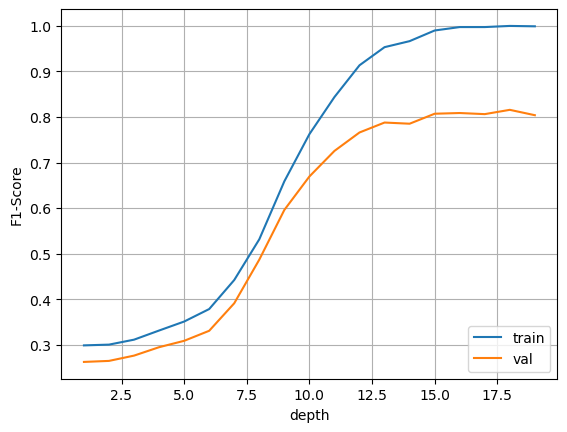

In [30]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(list(np.arange(l,u,d)), train_scores, label="train")
plt.plot(list(np.arange(l,u,d)), val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("depth")
plt.ylabel("F1-Score")
plt.grid()
plt.show()

In [31]:
# Model with depth_best
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve

best_idx = np.argmax(val_scores)
l_best = 15#l+d*best_idx
clf = RandomForestClassifier(max_depth=l_best, max_samples = row_sampling_rate, n_estimators=num_learners, random_state=0, class_weight={ 0:0.1, 1:w } )
clf.fit(X_train_transformed, y_train)

y_pred_val = clf.predict(X_cv_transformed)
val_score = f1_score(y_val, y_pred_val)

print(l_best)
print(val_score)

confusion_matrix(y_val, y_pred_val)

15
0.8072289156626505


array([[928,  28],
       [ 36, 134]])

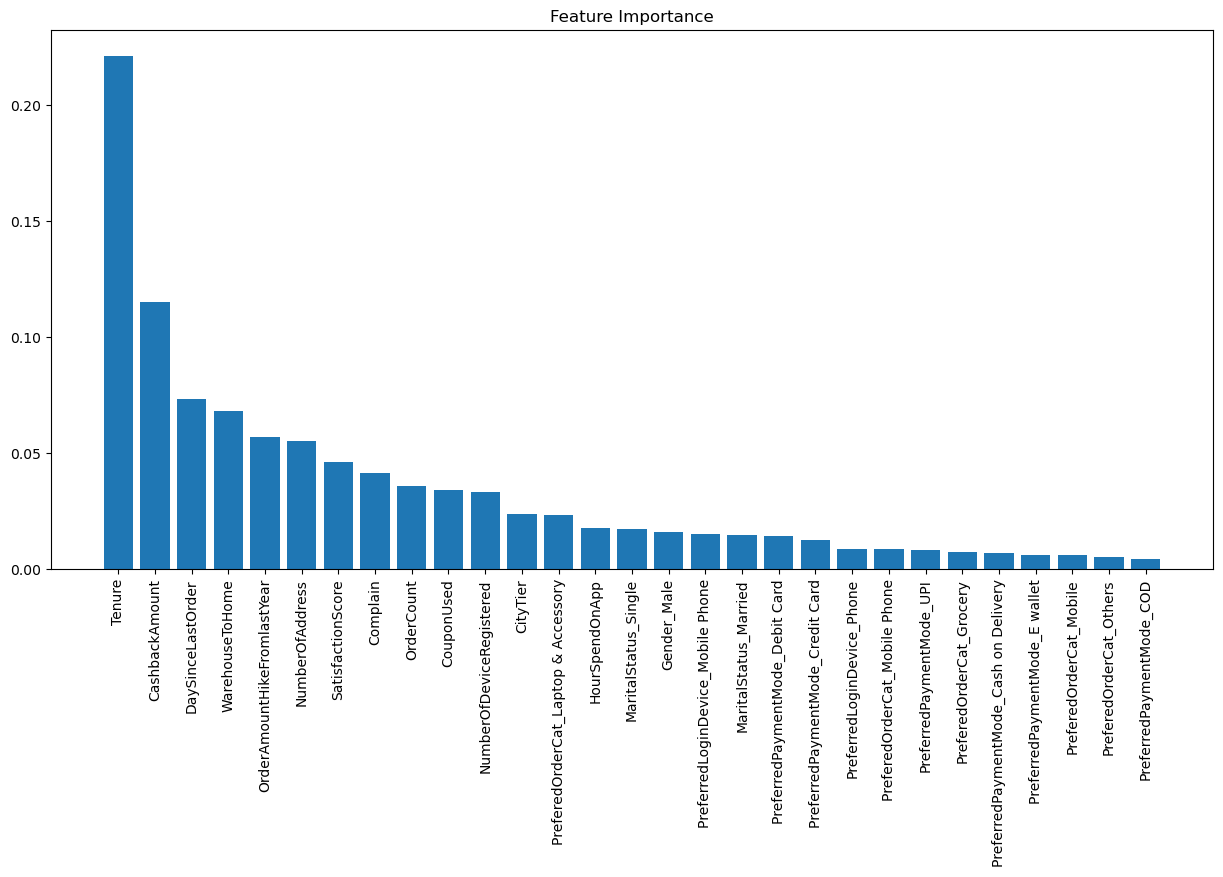

In [32]:
# Feature importance
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train_transformed.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train_transformed.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train_transformed.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

## GBDT

In [41]:
from sklearn.ensemble import GradientBoostingClassifier

train_scores = []
val_scores = []

num_learners=[50,100,150,200,250,300]

for base_learner in num_learners:
  clf=GradientBoostingClassifier(n_estimators=base_learner,)
#   clf = RandomForestClassifier(max_depth=depth, max_samples=row_sampling_rate, n_estimators=num_learners, random_state=0, class_weight={ 0:0.1, 1:w } )
  clf.fit(X_train_transformed, y_train)
  train_y_pred = clf.predict(X_train_transformed)
  val_y_pred = clf.predict(X_cv_transformed)
  train_score = f1_score(y_train, train_y_pred)
  val_score = f1_score(y_val, val_y_pred)
  train_scores.append(train_score)
  val_scores.append(val_score)

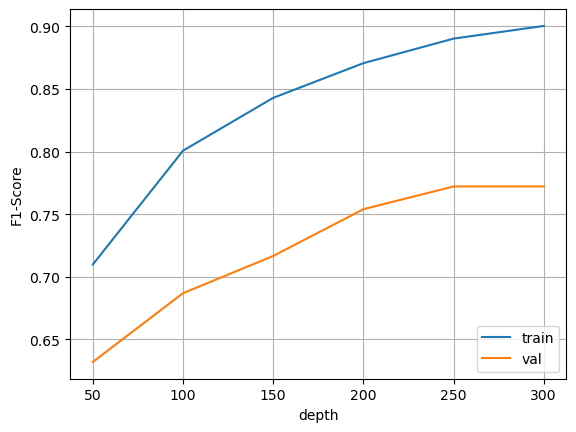

In [44]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(num_learners, train_scores, label="train")
plt.plot(num_learners, val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("depth")
plt.ylabel("F1-Score")
plt.grid()
plt.show()

In [55]:

from xgboost import XGBClassifier

train_scores = []
val_scores = []

num_learners=[1,2,3,5,10,50,100,150,200,250,300]

for base_learner in num_learners:
  clf=XGBClassifier(n_estimators=base_learner, max_depth=2, learning_rate=1, objective='binary:logistic')
  clf.fit(X_train_transformed, y_train)
  train_y_pred = clf.predict(X_train_transformed)
  val_y_pred = clf.predict(X_cv_transformed)
  train_score = f1_score(y_train, train_y_pred)
  val_score = f1_score(y_val, val_y_pred)
  train_scores.append(train_score)
  val_scores.append(val_score)

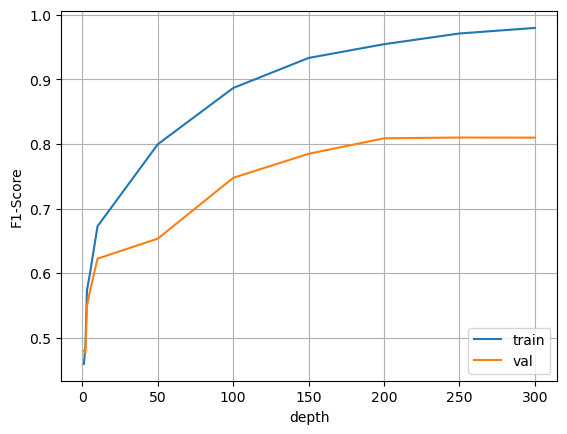

In [56]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(num_learners, train_scores, label="train")
plt.plot(num_learners, val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("depth")
plt.ylabel("F1-Score")
plt.grid()
plt.show()